# Derivada de una imagen

En este ejemplo vamos a calcular las derivadas en la dirección $x$ y $y$ de una imagen de entrada. Para ello vamos a usar la herramienta de convolución entre la imagen de entrada y un kernel. La convolución entre una imagen $I[m,n]$ y un kernel $k[m,n]$ se define como:

$$
I[m,n] \ast k[m,n] = \sum_{k,l} I[k,l]  \; k[m-k,n-l]
$$


Para implementar el calculo de la derivada, haremos uso de los filtros *Sobel*:

$$
Dx = \begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1\\
\end{bmatrix} \qquad \qquad
Dy = \begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1\\
\end{bmatrix}
$$

Representando la convolución con $Dx$ la derivada parcial de la imagen respecto a $x$ y la convolución con $Dy$ la derivada parcial de la imagen respecto a $y$.

Para implementar la convolución hemos creado la siguiente función:

In [1]:
import numpy as np
def conv(im,k):
    r,c = k.shape

    if not r == c or len(im.shape) == 3: #Revisamos que el kernel sea cuadrado y que la imagen este en escala de grices
        return None


    row, colum = im.shape
    shift = int((r-1)/2)

    output = np.zeros(im[shift:-shift,shift:-shift].shape)
    k = np.rot90(k,2) #Invertimos la imgen en ambas direcciones (lo cual es equivalente a girar el kernel 180°)
    
    for m,i in enumerate(np.arange(shift,row-shift-1)):
        for l,j in enumerate(np.arange(shift,colum-shift-1)):
            window = im[i-shift:i+shift+1,j-shift:j+shift+1]
            output[m,l] = (window*k).sum()

    return output

Como vemos, esta función creada recibe como parámetros de entrada la imagen en escala de grices y el kernel de convolución. El kernel, tal como lo expresa la ecuación de convolución, debe ser invertido tanto en la dirección vertical como en la horizontal. Luego, multiplicamos punto a punto el kernel con una ventana de la imagen del mismo tamaño del filtro centrada en $(i,j)$. Después de esto sumamos y asignamos este valor a la imagen de salida. Cabe resaltar que esta función diseañada calcula la convulución valida, es decir, la imagen de salida es más pequeña que la de entrada ya que no se rellena con ceros u otros valores la imágen original como en los otros tipos de convolución.

Ahora haremos pruebas concentras con la siguiente imagen:

![](data\Edificio.png)

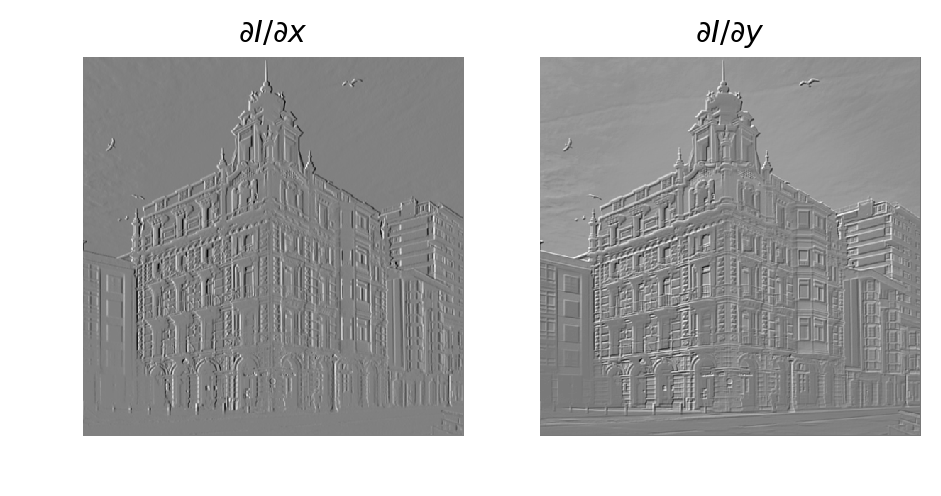

In [2]:
from matplotlib import pyplot as plt
from PIL import Image

im = np.array(Image.open('data/Edificio.png').convert('L'), np.float32)
Dx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Dy = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])

imx = conv(im,Dx)
imy = conv(im,Dy)

plt.figure(dpi = 180)
plt.subplot(121), plt.imshow(imx,cmap='gray'), plt.axis('off'), plt.title(r'$\partial I/\partial x$')
plt.subplot(122), plt.imshow(imy,cmap='gray'), plt.axis('off'), plt.title(r'$\partial I/\partial y$')
plt.show()

Calculando ahora la magnitud del gradiente de la imagen $|\nabla I| = \sqrt{I_x^2+I_y^2}$

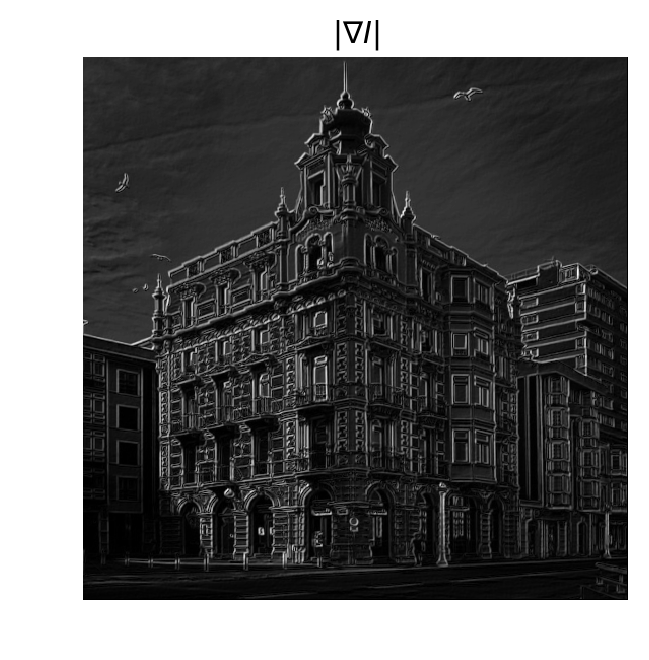

In [3]:
mag = np.sqrt(imx**2+imy**2)
plt.figure(dpi = 180)
plt.imshow(mag,cmap='gray'), plt.axis('off'), plt.title(r'$|\nabla I|$')
plt.show()